In [9]:
%matplotlib inline

In [10]:
import numpy as np
import matplotlib as mpl
import os
import matplotlib.pyplot as plt
import matplotlib.animation
import tsa_utils
#import png

In [12]:
matplotlib.rc('animation', html='html5')

def plot_image(path):
    data = tsa_utils.read_data(path)
    fig = mpl.pyplot.figure(figsize = (16,16))
    ax = fig.add_subplot(111)
    def animate(i):
        im = ax.imshow(np.flipud(data[:,:,i].transpose()), cmap = 'viridis')
        return [im]
    return matplotlib.animation.FuncAnimation(fig, animate, frames=range(0,data.shape[2]), interval=200, blit=True)

KeyboardInterrupt: 

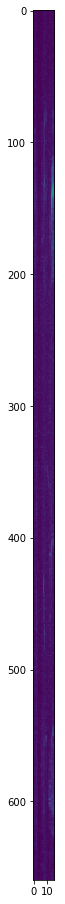

In [13]:
plot_image("./images/.aps")

In [23]:
data =tsa_utils.read_data_coords("./images/0ada538288f0b62b01510b397a8acb9e.aps", 0,0,200,200)

(512, 660, 16)
(200, 200, 16)


In [43]:
data =tsa_utils.read_data("./images/0043db5e8c819bffc15261b1f1ac5e42.aps")

In [44]:
data.shape

(16, 660, 512)

(660, 512)
(16, 660, 512)


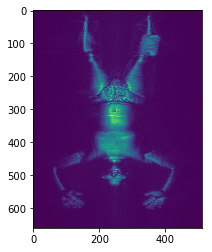

(660, 512)
(16, 660, 512)


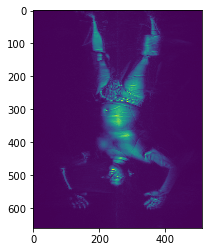

(660, 512)
(16, 660, 512)


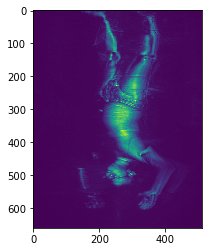

(660, 512)
(16, 660, 512)


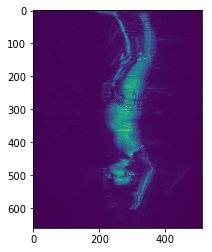

(660, 512)
(16, 660, 512)


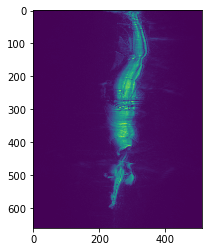

(660, 512)
(16, 660, 512)


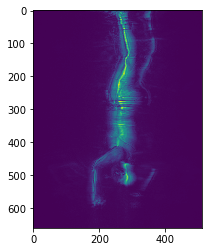

(660, 512)
(16, 660, 512)


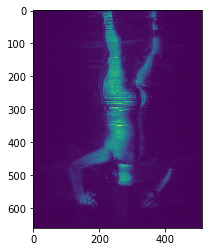

(660, 512)
(16, 660, 512)


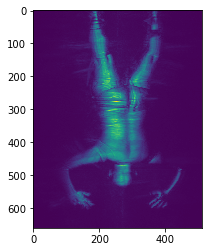

(660, 512)
(16, 660, 512)


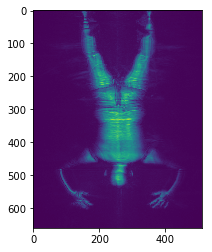

(660, 512)
(16, 660, 512)


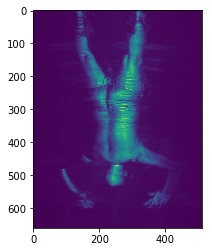

(660, 512)
(16, 660, 512)


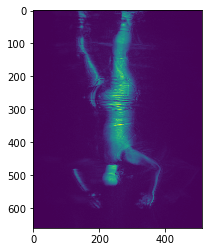

(660, 512)
(16, 660, 512)


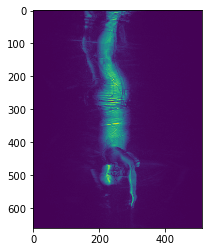

(660, 512)
(16, 660, 512)


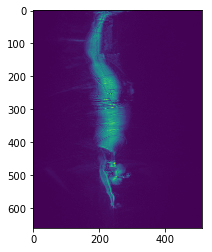

(660, 512)
(16, 660, 512)


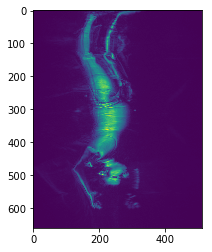

(660, 512)
(16, 660, 512)


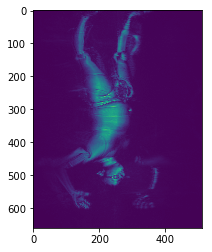

(660, 512)
(16, 660, 512)


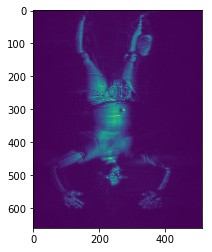

In [45]:
transformed_data = []
for i in range(0,16):
    increment = 10
#     print(data[(i * increment):(i * increment) + 170,:,i])
    #transformed_data.append(data[(i * increment) + 50:(i * increment) + 320,:,i])
    print(data[i,:,:].shape)
    plt.imshow(data[i,:,:])
    print(data.shape)
    plt.show()

In [345]:
data.shape

(16, 660, 512)

In [282]:
data[:,:,12].shape

(16, 340)

In [73]:
big[200]

NameError: name 'big' is not defined

In [74]:
q = data[:, 220:660, :]

In [75]:
q[0].shape

(440, 16)

In [48]:
transformed_data[0].shape

IndexError: list index out of range

In [48]:
plt.imshow(data[:,:,4]) 
plt.show()

In [13]:
w = png.Writer(660, 512)
pngfile = open("./frame.png","wb+")
w.write(pngfile, data[:,:,12])
pngfile.close()

NameError: name 'png' is not defined

In [18]:
data[:,:,12]

array([[  3.31961019e-06,   3.18682578e-06,   3.48559070e-06, ...,
          2.98764917e-06,   3.26981603e-06,   3.25321798e-06],
       [  4.16611056e-06,   3.88394392e-06,   4.69724819e-06, ...,
          3.58517900e-06,   3.23661993e-06,   3.91714002e-06],
       [  3.78435561e-06,   3.31961019e-06,   4.86322915e-06, ...,
          3.60177705e-06,   3.43579654e-06,   4.03332615e-06],
       ..., 
       [  4.64745426e-06,   4.76364039e-06,   3.65157121e-06, ...,
          3.23661993e-06,   3.81755171e-06,   3.22002188e-06],
       [  3.51878680e-06,   3.73456146e-06,   3.50218875e-06, ...,
          3.53538485e-06,   4.01672833e-06,   4.29889496e-06],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]], dtype=float32)

In [15]:
for x in range(0,11):
    plt.imshow(data[:,:,x]) 
    plt.show()

In [24]:
i


15